In [3]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(dplyr))
load("environment/real_datasets/GSE100505/mapDf.RData")
dir <- "environment/real_datasets/GSE100505/mode_gcbias=True/posttype=gibbs_npost=100_tf=100/comp_trees"
load(file.path(dir, "yAggConsNS.RData"))
load(file.path(dir, "yAggConsNS0.RData"))
load(file.path(dir, "yAggMeanInfNS0.RData"))
load(file.path(dir, "yAggCorNS.RData"))
load(file.path(dir, "yAggThrNS.RData"))
load(file.path(dir, "treeCons0.RData"))
load(file.path(dir, "treeCons.RData"))
load(file.path(dir, "treeMeanInf0.RData"))
load(file.path(dir, "treeCor.RData"))
load(file.path(dir, "treeThr.RData"))


### Plotting mean Infrv

In [67]:
### Consensus
depth <- node.depth(treeCons,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- data.frame(infRV = mcols(yAggConsNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Consensus")

In [68]:
### Consensus0
depth <- node.depth(treeCons0,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggConsNS0)[["meanInfRV"]], depth = depth, modDep = modDep, type="Consensus0"))

In [69]:
### Correlation
depth <- node.depth(treeCor,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggCorNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Anti-Correlation"))

In [70]:
### Mean Inf 0 threshold
depth <- node.depth(treeMeanInf0,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggMeanInfNS0)[["meanInfRV"]], depth = depth, modDep = modDep, type="MeanInf0"))

In [71]:
### Threshold
depth <- node.depth(treeThr,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggThrNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Threshold"))

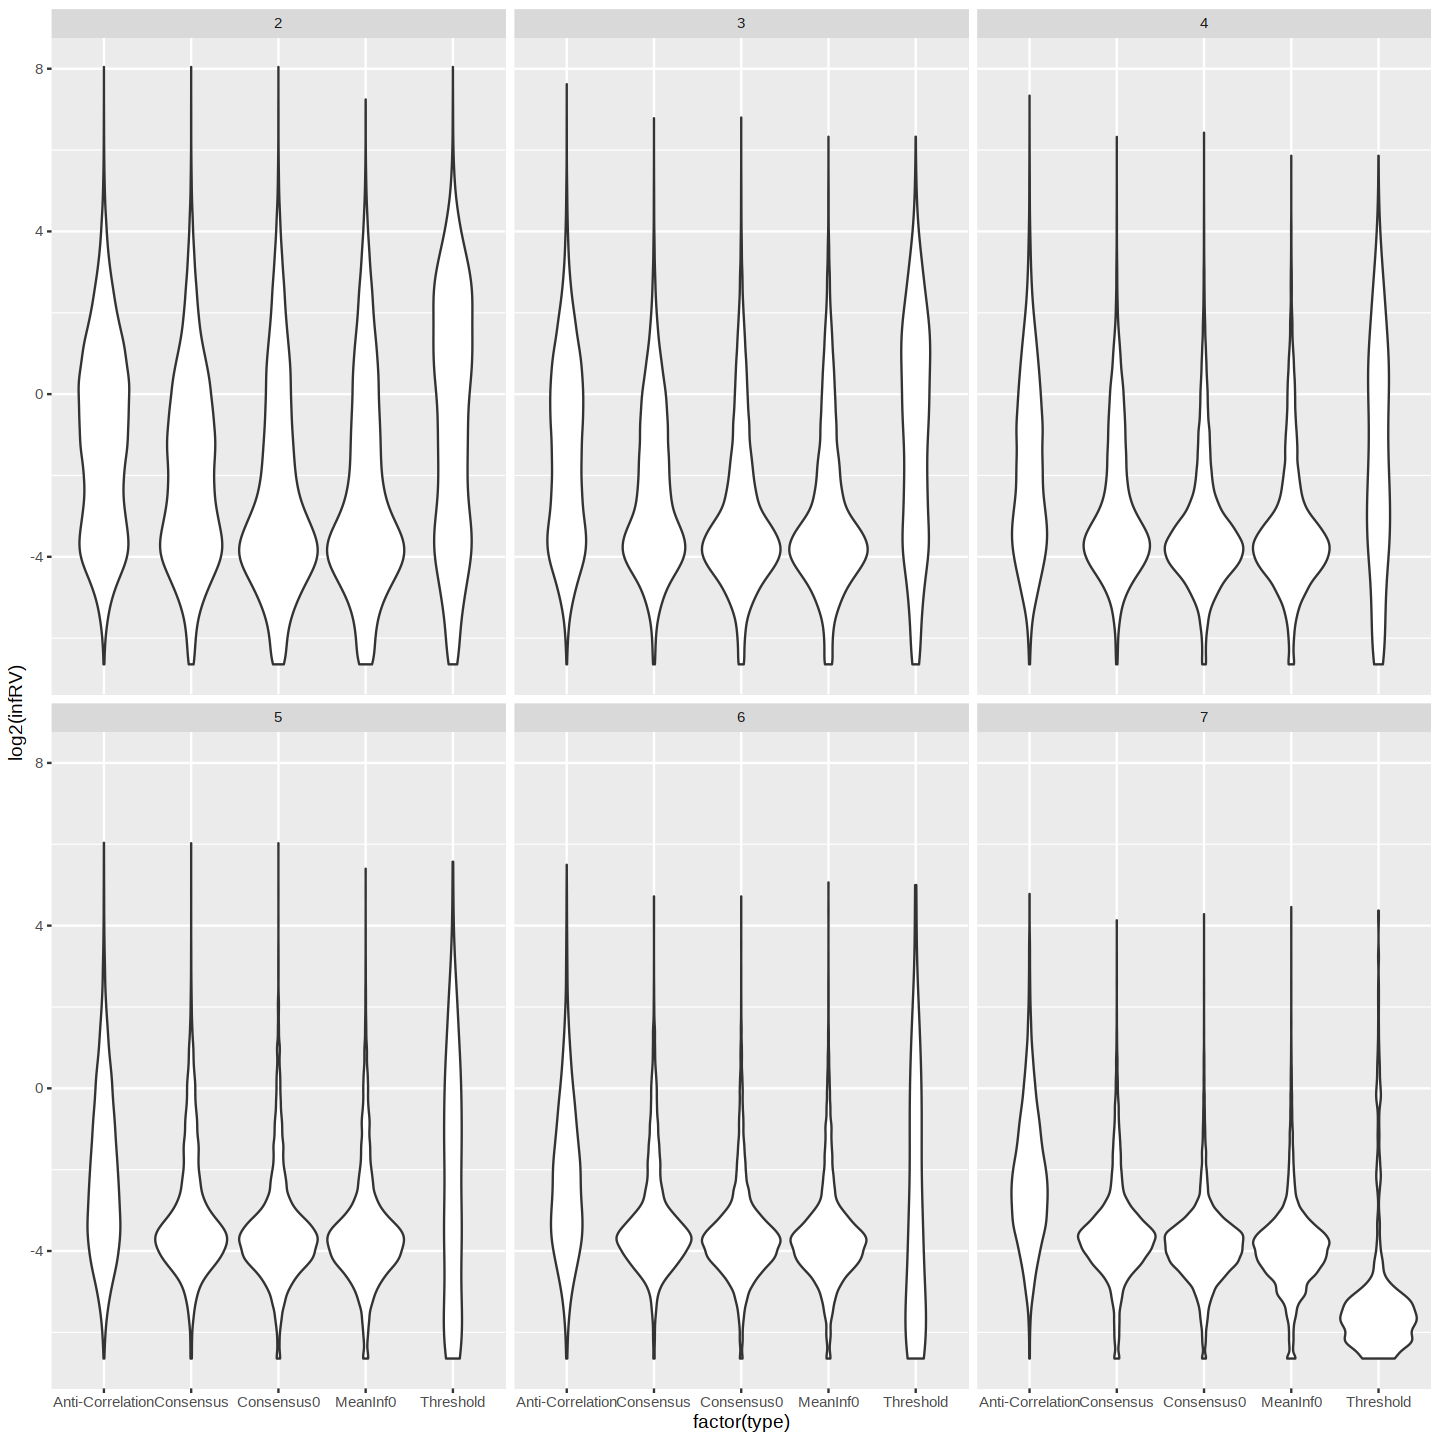

In [11]:
options(repr.plot.width=12, repr.plot.height=12)
dfInfRV %>% filter(depth!=1) %>% ggplot(aes(x=factor(type), y=log2(infRV))) + geom_violin() + facet_wrap(vars(modDep))

In [12]:
reshape::cast(dfInfRV %>% filter(depth!=1) %>% group_by(type,modDep), type~modDep,
              value="infRV", fun.aggregate = median)

,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,0.4713619,0.34518987,0.24056357,0.18938924,0.18009611,0.19288388
2,Consensus,0.2352868,0.14069174,0.10008451,0.08800232,0.08331597,0.07789946
3,Consensus0,0.1184557,0.09175925,0.08152912,0.07738531,0.07402071,0.06706893
4,MeanInf0,0.1200413,0.08937385,0.08042340,0.07599017,0.07247994,0.06364736
5,Threshold,0.6809029,0.53775411,0.29102117,0.16991772,0.09050044,0.02033177


In [13]:
### Consensus
innNodes <- length(treeCons$tip)+1:treeCons$Nnode
childNodes <- Descendants(treeCons, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggConsNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggConsNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- data.frame(red = c(rep(1000,length(treeCons$tip)), redInfRV), type="Consensus")
save(dfRedInf, file = "environment/real_datasets/GSE100505/mode_gcbias=True/posttype=gibbs_npost=100_tf=100/comp_trees/dfRedInf.RData")

In [27]:
### Consensus0
innNodes <- length(treeCons0$tip)+1:treeCons0$Nnode
childNodes <- Descendants(treeCons0, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggConsNS0)[innNodes[i], "meanInfRV"] - mean(mcols(yAggConsNS0)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeCons0$tip)), redInfRV), type="Consensus0"))
save(dfRedInf, file = file.path(dir, "dfRedInf.RData"))

In [61]:
### Anti-Correlation
innNodes <- length(treeCor$tip)+1:treeCor$Nnode
childNodes <- Descendants(treeCor, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggCorNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggCorNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeCor$tip)), redInfRV), type="Anti-Correlation"))
save(dfRedInf, file = file.path(dir, "dfRedInf.RData"))

In [29]:
### Mean Inf 0 Thr
innNodes <- length(treeMeanInf0$tip)+1:treeMeanInf0$Nnode
childNodes <- Descendants(treeMeanInf0, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggMeanInfNS0)[innNodes[i], "meanInfRV"] - mean(mcols(yAggMeanInfNS0)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeMeanInf0$tip)), redInfRV), type="MeanInf0"))
save(dfRedInf, file = file.path(dir, "dfRedInf.RData"))

In [30]:
### Threshold
innNodes <- length(treeThr$tip)+1:treeThr$Nnode
childNodes <- Descendants(treeThr, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggThrNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggThrNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeThr$tip)), redInfRV), type="Threshold"))
save(dfRedInf, file = file.path(dir, "dfRedInf.RData"))

In [72]:
dfInfRV <- cbind(dfInfRV, redInfRV = dfRedInf$red)
save(dfInfRV, file = "environment/real_datasets/GSE100505/mode_gcbias=True/posttype=gibbs_npost=100_tf=100/comp_trees/dfInfRV.RData")

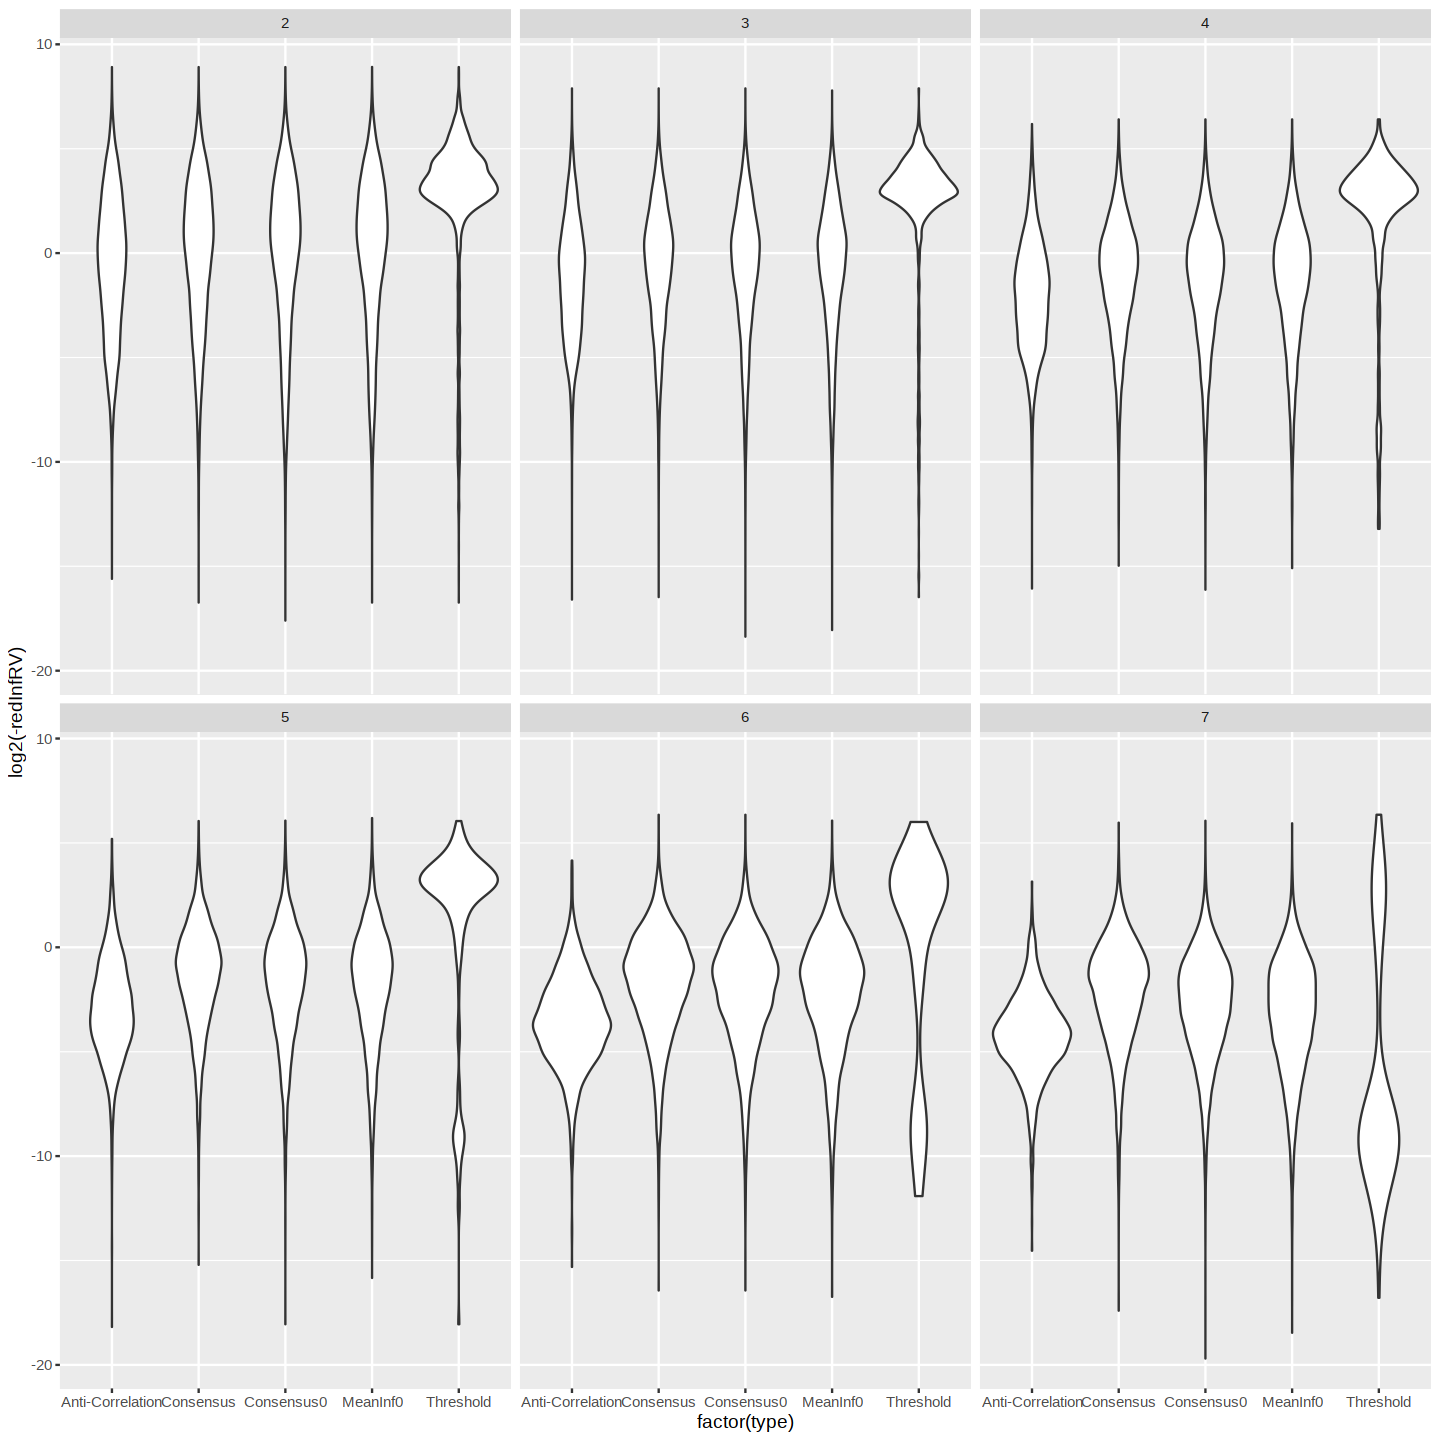

In [73]:
options(repr.plot.width=12, repr.plot.height=12)
dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% ggplot(aes(x=factor(type), y=log2(-redInfRV))) + geom_violin() + facet_wrap(vars(modDep))

In [74]:
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, length)
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, median, value="redInfRV")
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, min, value="redInfRV")

Using redInfRV as value column.  Use the value argument to cast to override this choice



,type,2,3,4,5,6,7
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,Anti-Correlation,21457,11848,6652,3925,2226,2846
2,Consensus,17855,11543,8291,5811,4034,8249
3,Consensus0,17516,11976,9049,6950,5247,15211
4,MeanInf0,16926,11938,9160,7127,5483,19184
5,Threshold,5917,1776,604,201,78,189


,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,-0.777996,-0.4598834,-0.2432245,-0.1249100,-0.08236788,-0.054643260
2,Consensus,-1.306337,-0.7969842,-0.5396236,-0.4412541,-0.36674270,-0.279873787
3,Consensus0,-1.381457,-0.7473235,-0.4854338,-0.3542485,-0.28461274,-0.167564914
4,MeanInf0,-1.519307,-0.7566089,-0.4785008,-0.3415642,-0.26451114,-0.124164934
5,Threshold,-10.221116,-8.6141331,-7.4231932,-7.8165153,-5.48769725,-0.002486895


,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,-481.0604,-236.9690,-72.60936,-36.52966,-17.82401,-8.857447
2,Consensus,-481.0604,-236.9690,-84.66686,-66.15676,-81.45521,-62.648806
3,Consensus0,-481.0604,-236.9690,-84.66686,-67.01522,-81.45521,-66.791370
4,MeanInf0,-483.0762,-221.2162,-84.66686,-73.05331,-67.07708,-61.320359
5,Threshold,-481.0604,-236.9690,-84.66686,-66.15676,-64.14910,-81.527942


In [16]:
load(file.path(dir, "genesCons0.RData"))
load(file.path(dir, "genesCons.RData"))
load(file.path(dir, "genesCor.RData"))
load(file.path(dir, "genesMeanInf0.RData"))
load(file.path(dir, "genesThr.RData"))

In [17]:
dfNGenes <- data.frame(matrix(nrow=0, ncol=3))
colnames(dfNGenes) <- c("Type", "nGenes", "depth")
dfNGenes <- rbind(dfNGenes, data.frame(Type="Consensus", nGenes = sapply(genesCons[2:length(genesCons)], length), 
                                       depth = node.depth(treeCons,2)[length(treeCons$tip)+2:treeCons$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Consensus0", nGenes = sapply(genesCons0[2:length(genesCons0)], length), 
                                       depth = node.depth(treeCons0,2)[length(treeCons0$tip)+2:treeCons0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Anti-Correlation", nGenes = sapply(genesCor[2:length(genesCor)], length), 
                                       depth = node.depth(treeCor,2)[length(treeCor$tip)+2:treeCor$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="MeanInf0", nGenes = sapply(genesMeanInf0[2:length(genesMeanInf0)], length), 
                                       depth = node.depth(treeMeanInf0,2)[length(treeMeanInf0$tip)+2:treeMeanInf0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Threshold", nGenes = sapply(genesThr[2:length(genesThr)], length), 
                                       depth = node.depth(treeThr,2)[length(treeThr$tip)+2:treeThr$Nnode]))

dfNGenes[dfNGenes$depth > 6,"depth"]=7

In [ ]:
genesThr

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 696


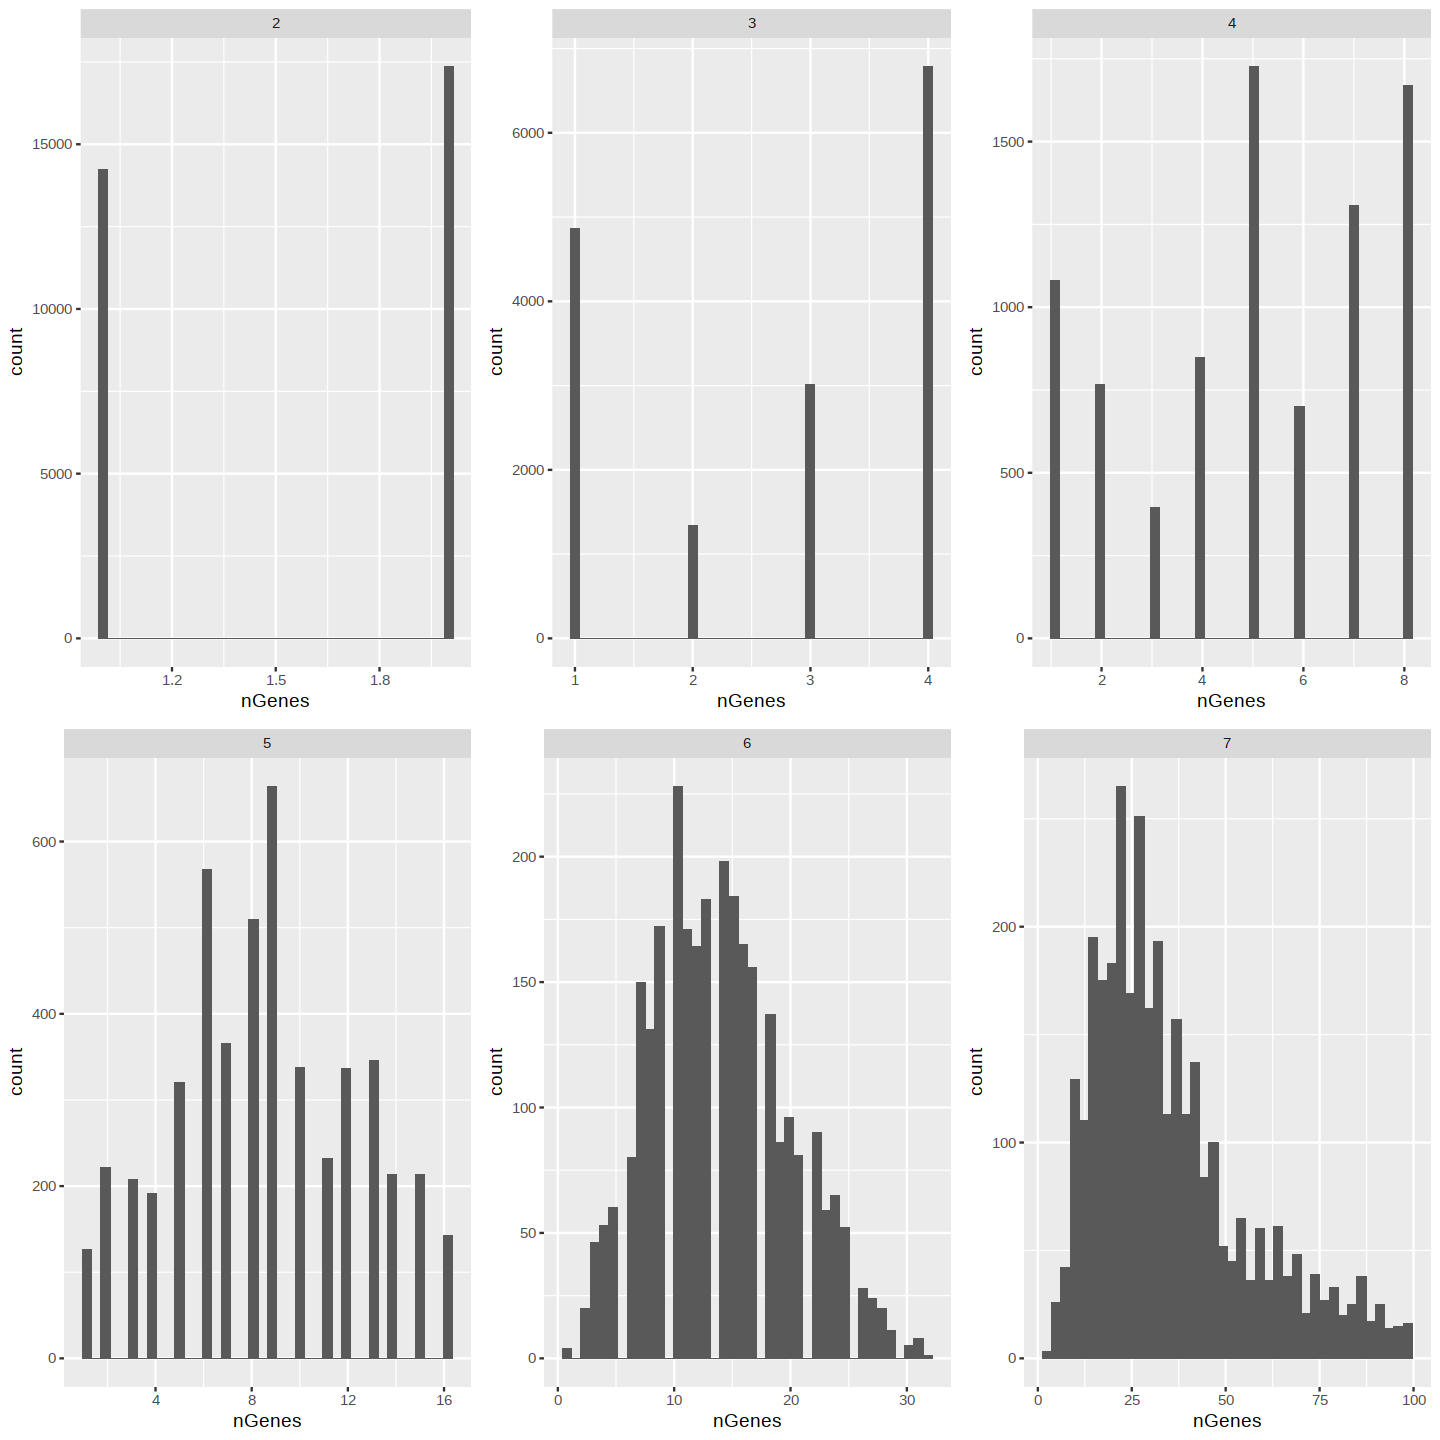

In [20]:
#### Anti-Correlation
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Anti-Correlation" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Anti-Correlation" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 37



    1     2     3     4     5     6     7     8     9    10    11    12    13 
60561  5426  1515   517   258   189   115    74    63    65    48    34    32 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
   26    19    26    21    16    17    16    13    14    15    11    11    12 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
   10    10    10     9     8     9     8     8    10     7     7     7     8 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    7     6     6     4     4     5     5     4     4     4     5     3     3 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    4     3     3     3     3     2     3     3     3     3     4     3     4 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    2     1     1     1     1     2     2     1     1     1     1     2     1 
   79    80    81    82    83    84    85    86    

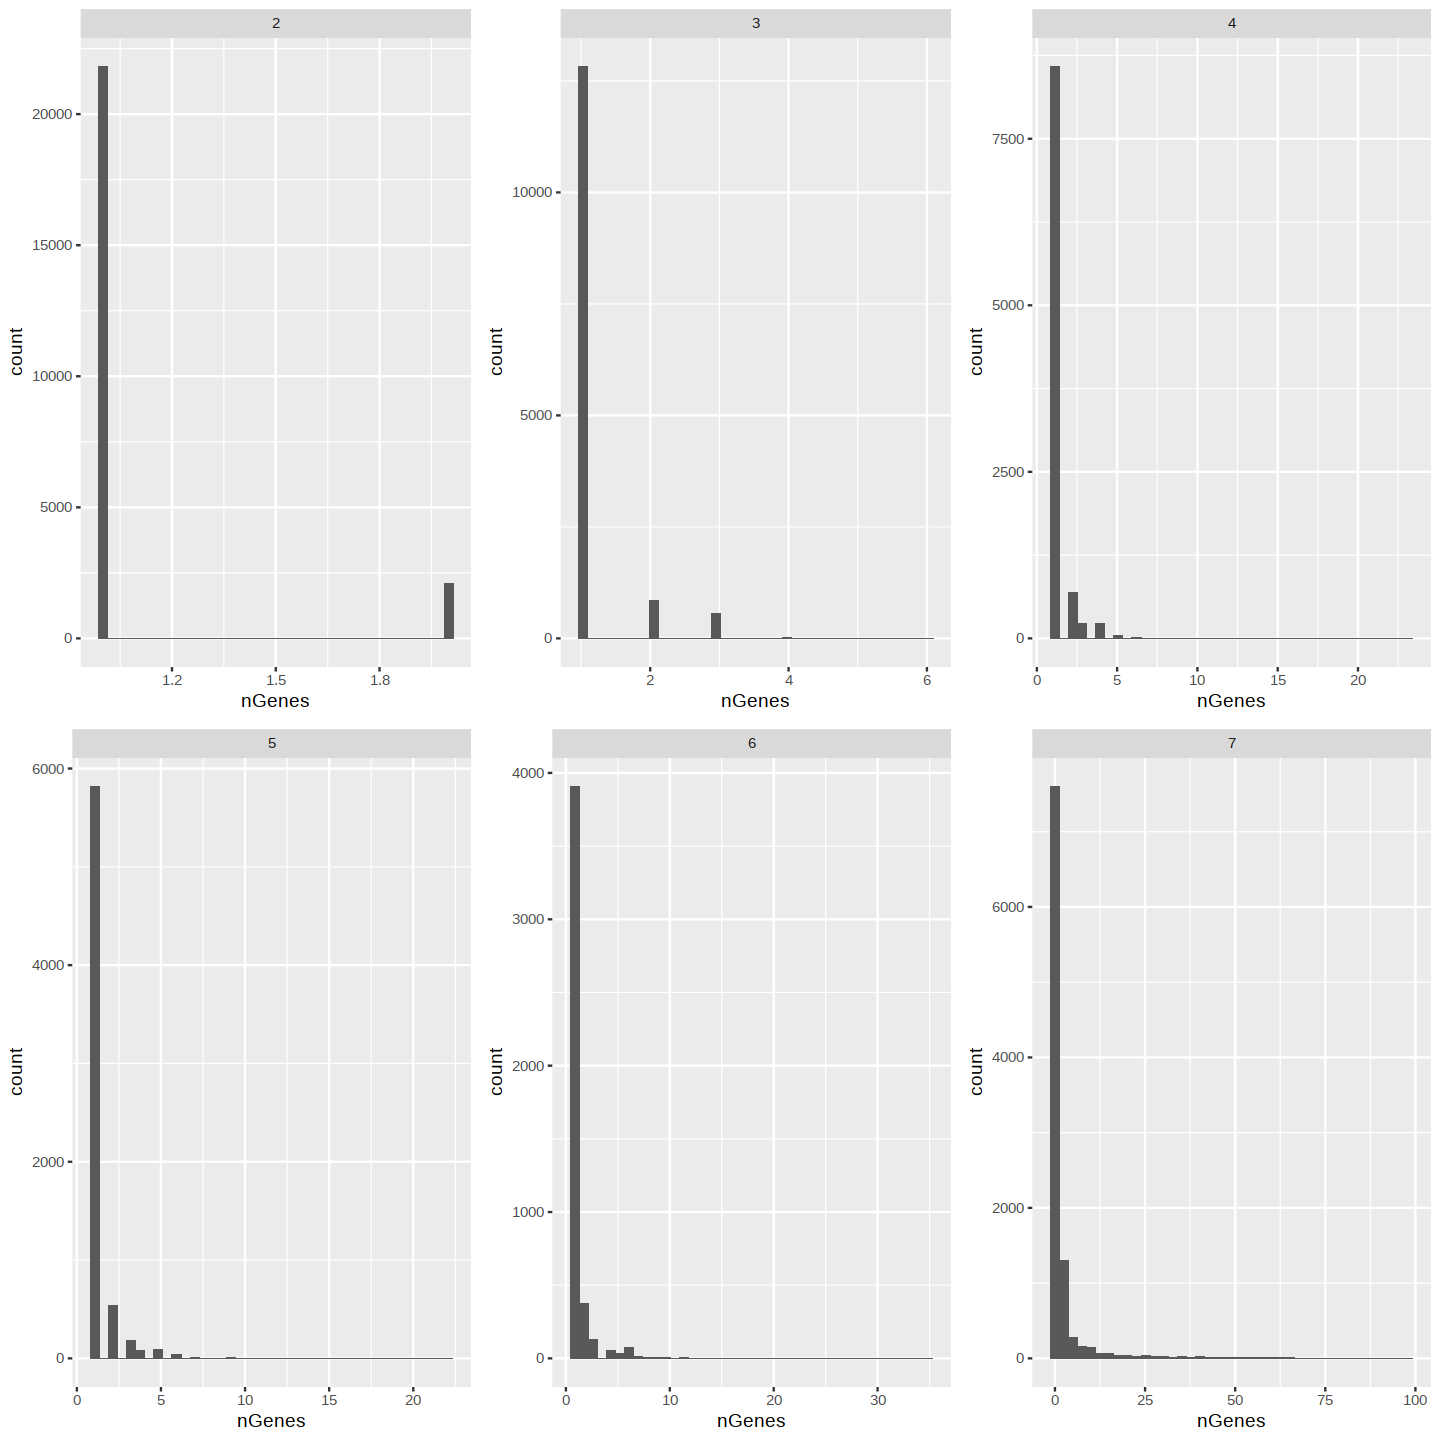

In [21]:
#### Consensus
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Consensus" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Consensus" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesCons,length))

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 44



    1     2     3     4     5     6     7     8     9    10    11    12    13 
66402  6883  2208   848   500   331   230   190   175   142   106    85    68 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
   62    55    61    41    39    35    23    21    23    21    19    19    13 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
   15    12    11     9    11     9    10    10    11    10     9     8     9 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
   10     9     8     8     9     8     7     6     6     7     8     4     4 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    5     4     3     4     3     3     4     4     3     5     3     4     3 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    3     2     3     2     2     2     1     1     2     4     2     1     2 
   79    80    81    82    83    84    85    86    

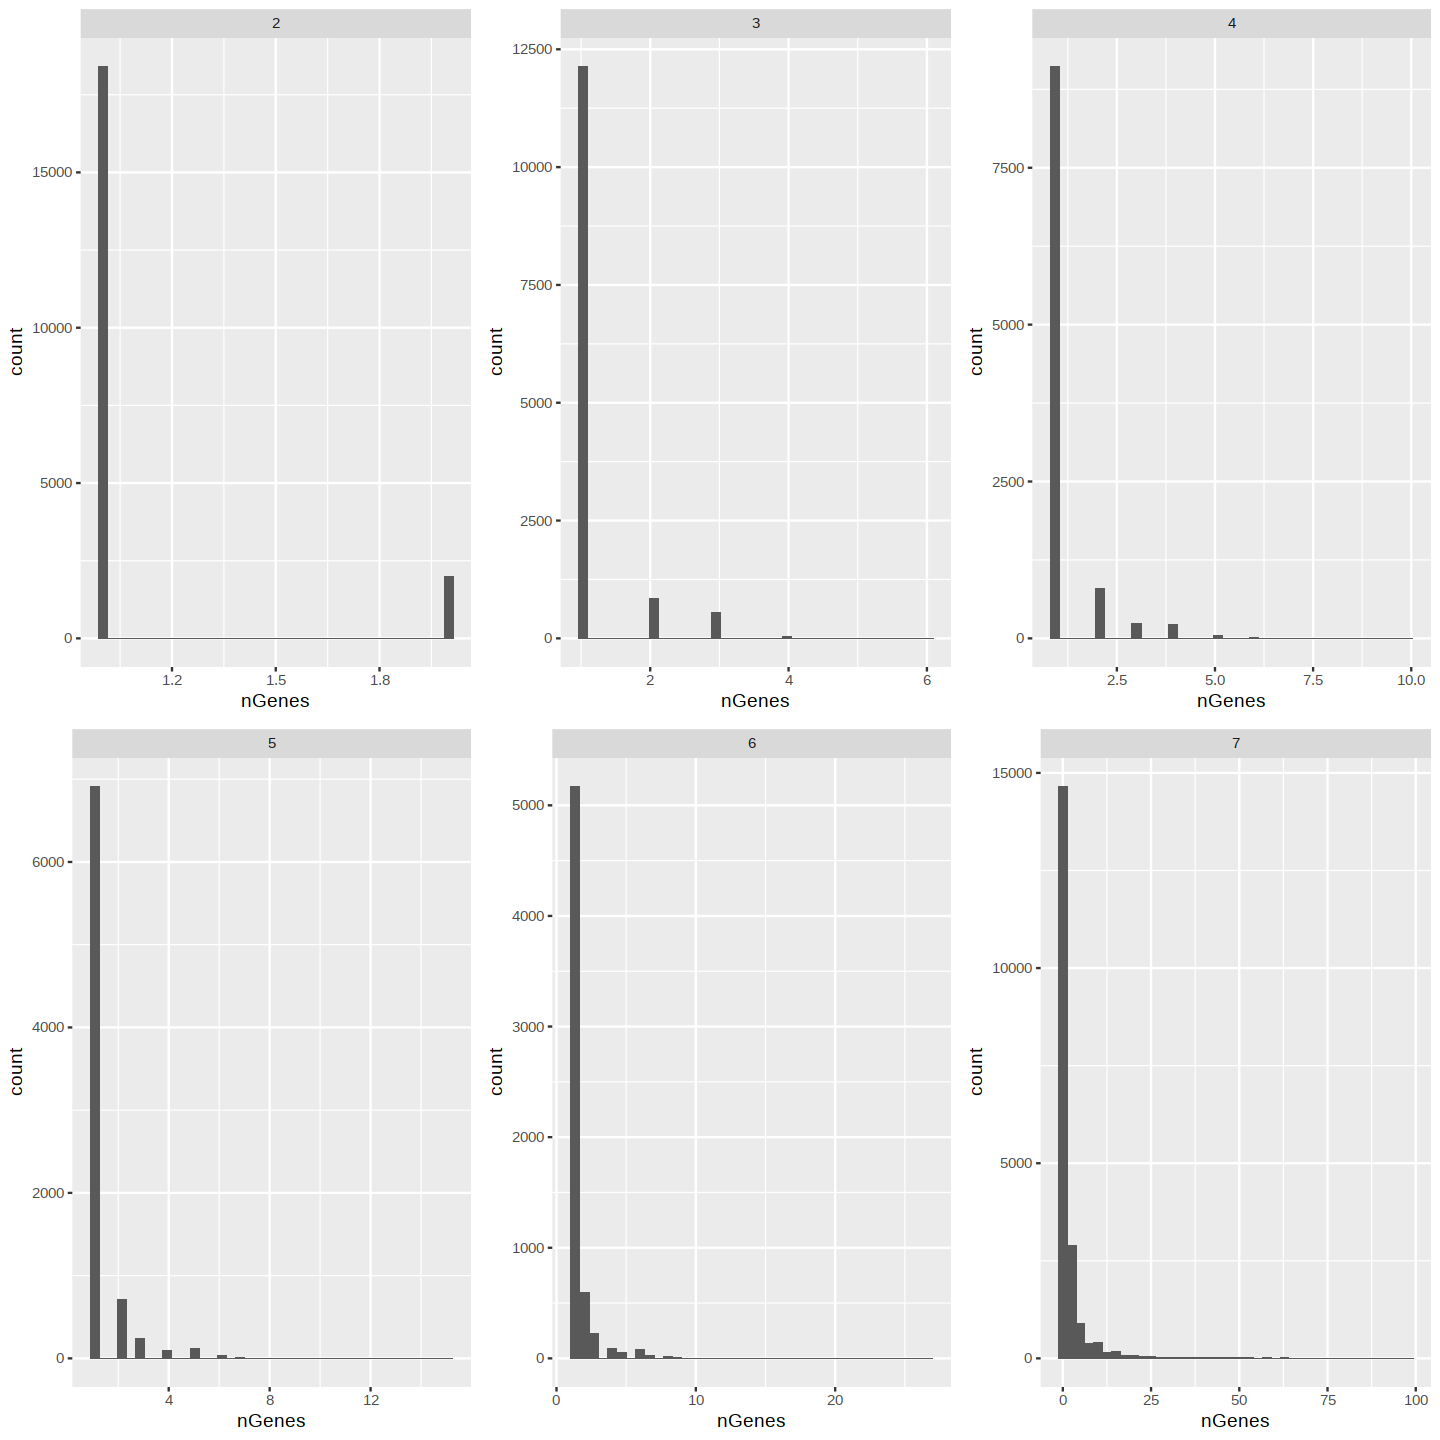

In [22]:
#### Consensus 0
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Consensus0" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Consensus0" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesCons0,length))

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 113



    1     2     3     4     5     6     7     8     9    10    11    12    13 
66106  6827  2754  1181   752   608   464   383   305   251   205   240   168 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
  137   119   130   100    86    76    79    77    60    68    58    50    51 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
   42    42    36    39    36    34    36    36    37    40    30    27    29 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
   30    26    23    27    27    23    21    20    21    18    17    20    18 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
   19    16    14    15    19    14    16    16    17    16    13    14    13 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
   11    11     9    12    11    13    16    12    11     9     8    10    14 
   79    80    81    82    83    84    85    86    

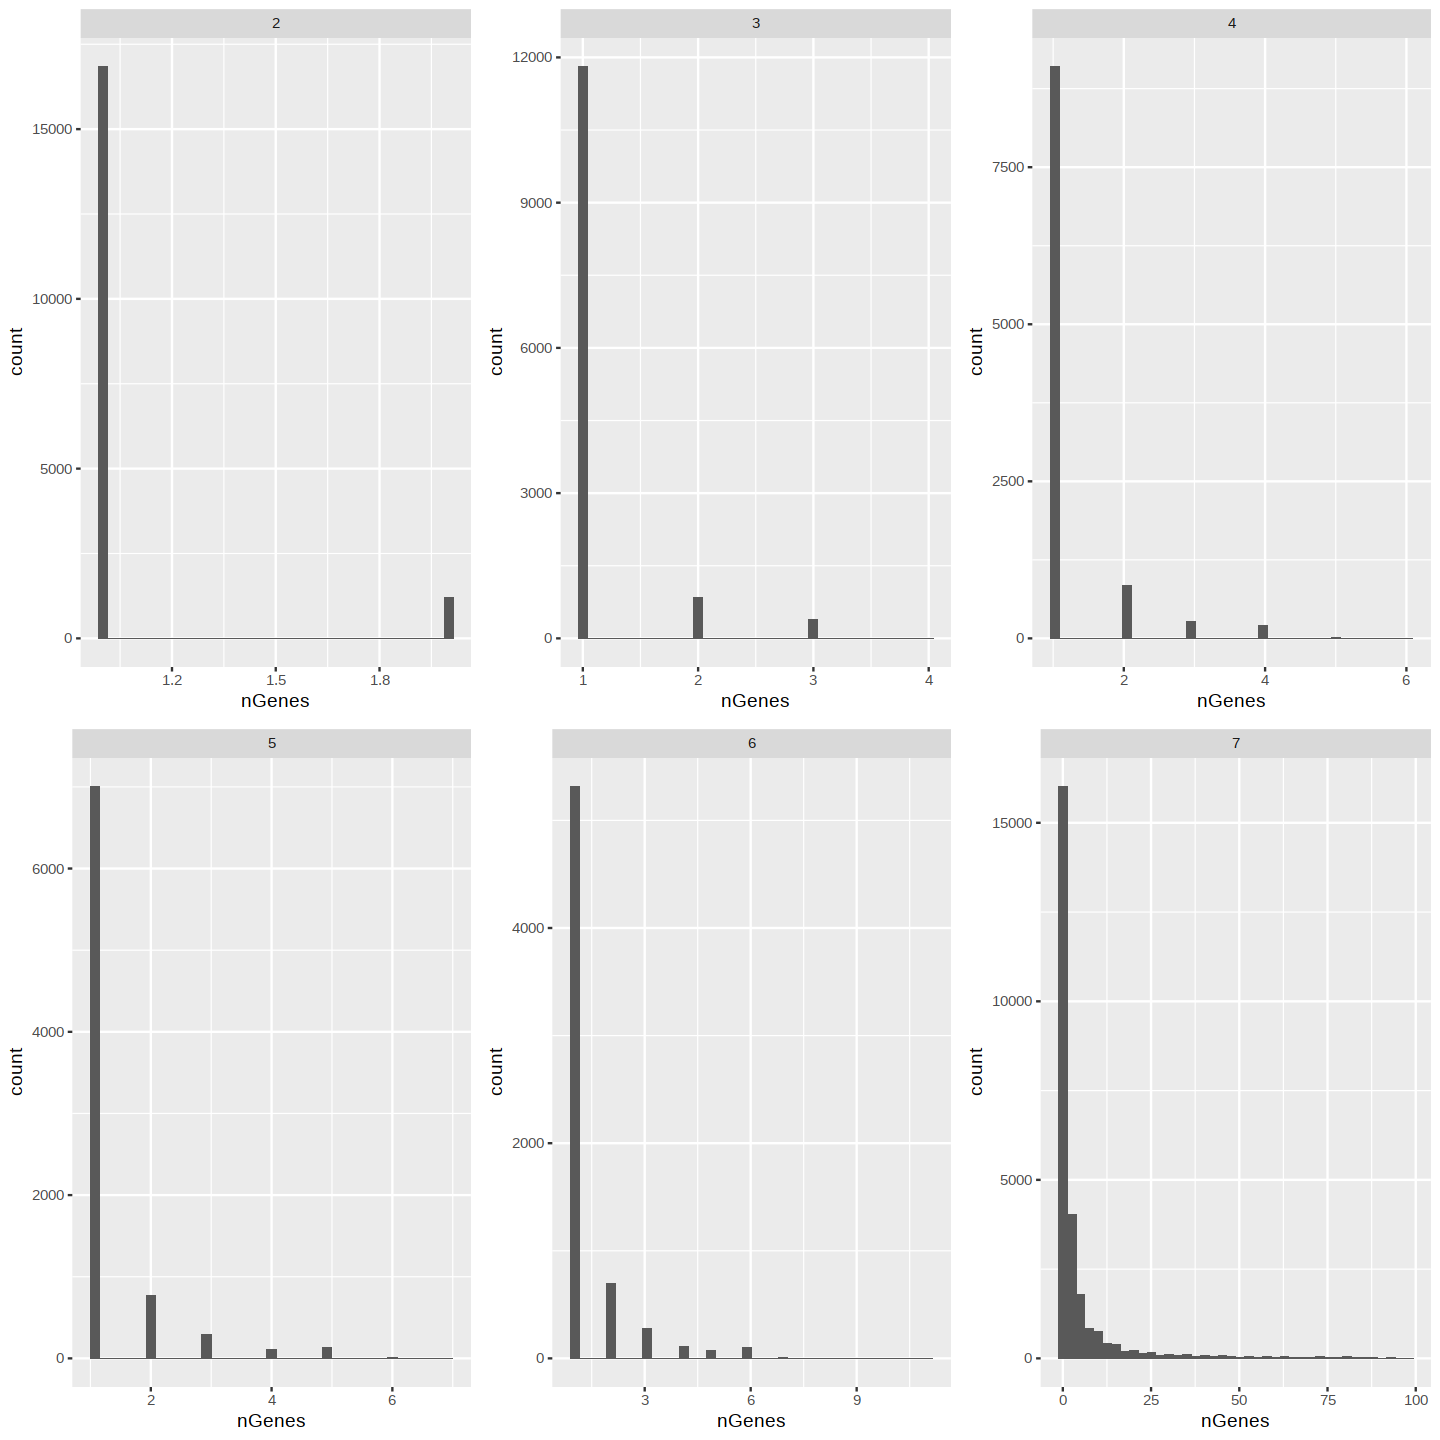

In [24]:
#### MeanInf0
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "MeanInf0" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "MeanInf0" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesMeanInf0,length))

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 36



    1     2     3     4     5     6     7     8     9    10    11    12    13 
 8969   747   226   123    87    70    61    36    31    26    23    24    21 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
   20    17    16    14    15    12    10    11    13    10    10    11     8 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    8     8     8     7     8     7     7     7     7     7     8     7     7 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    7     6     6     7     6     6     7     6     6     6     7     5     4 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    5     5     4     4     4     4     4     4     4     4     4     4     4 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    4     3     3     2     2     2     2     2     2     2     1     2     1 
   79    80    81    82    83    84    85    86    

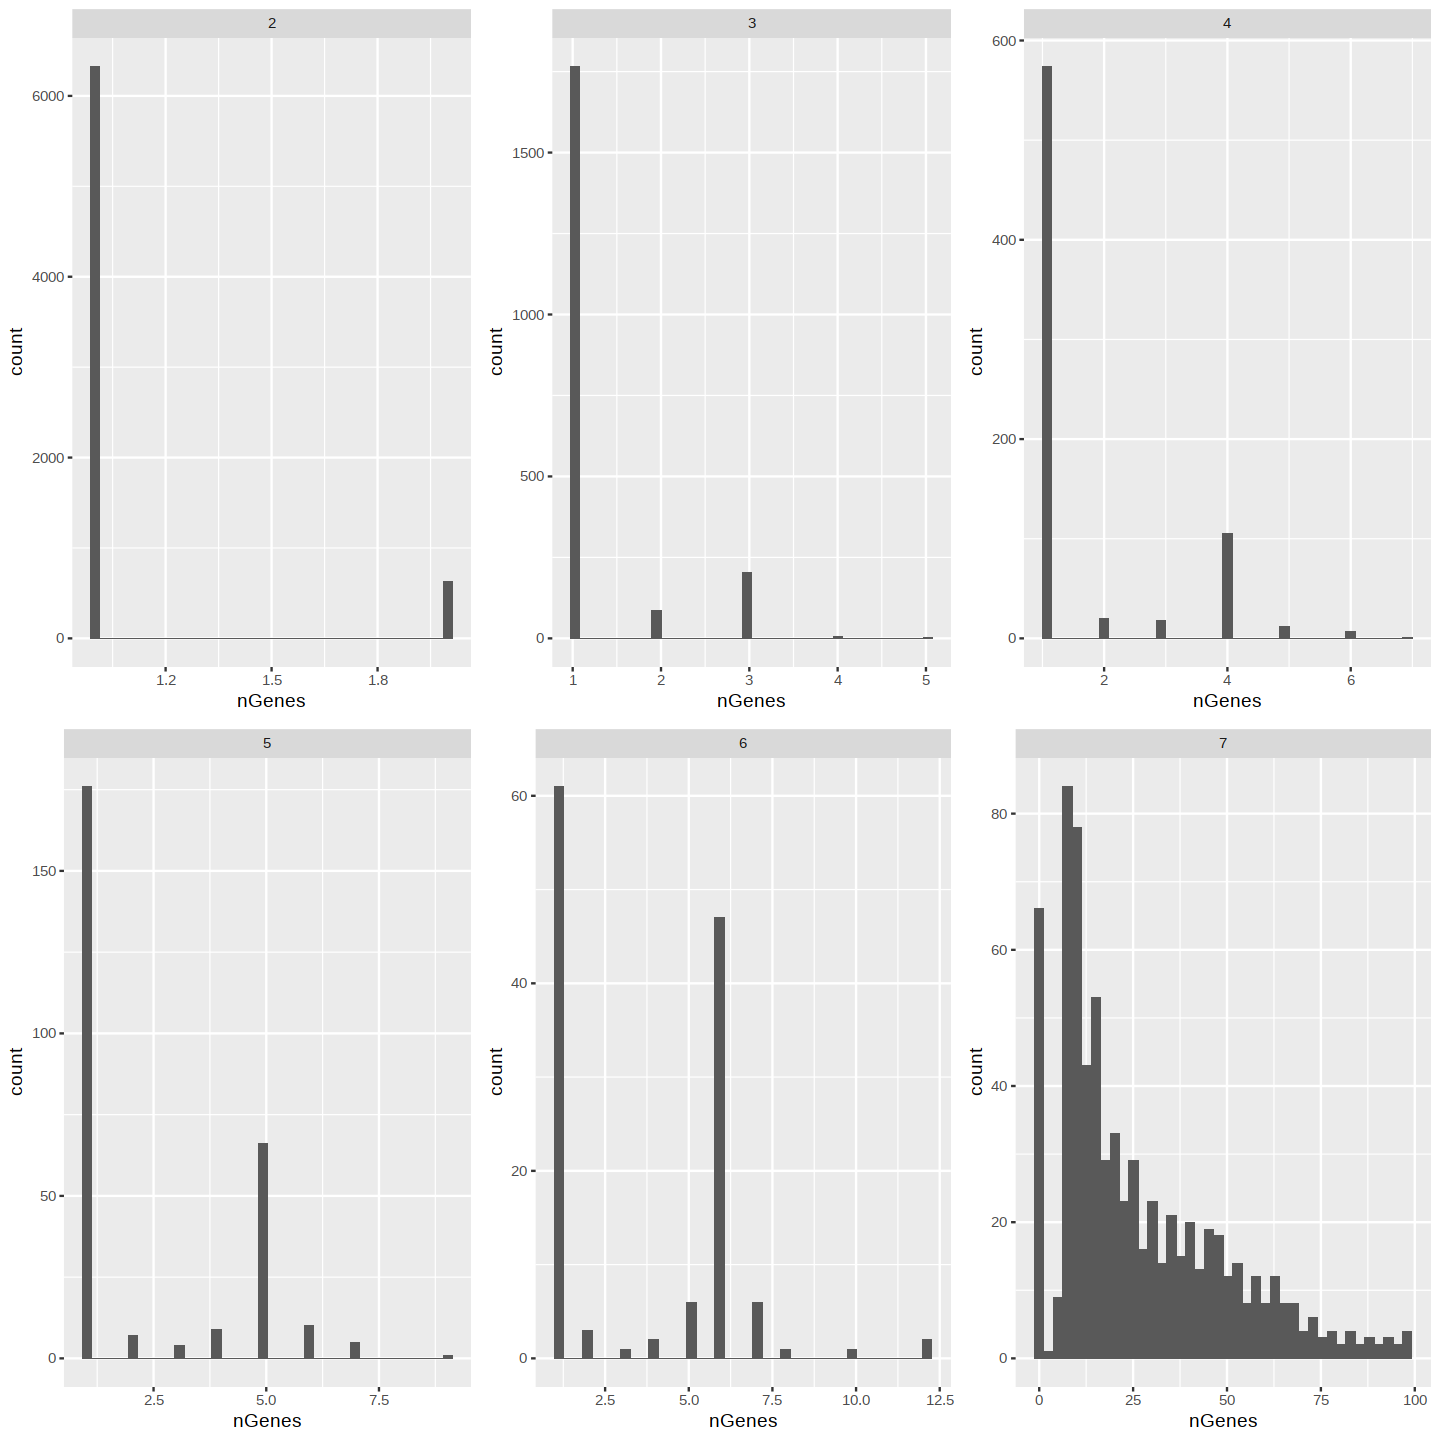

In [25]:
#### Threshold
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Threshold" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Threshold" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesThr,length))

In [9]:
library(biomaRt)
ensembl <- useEnsembl(biomart = "genes", dataset = "mmusculus_gene_ensembl")

In [108]:
which(sapply(genesCons,length)==40)
rGenes <- genesCons[[45278]]
rGenes <- gsub("\\.[0-9]+", "", rGenes)
dd <- getBM(attributes=c("ensembl_gene_id", "description"), filters="ensembl_gene_id", values=rGenes, mart=ensembl)
dd
dim(dd)

[1] 10933 45278 50678 56079 58155 64368 64432

ensembl_gene_id,description
<chr>,<chr>
ENSMUSG00000057945,predicted gene 17136 [Source:MGI Symbol;Acc:MGI:4937963]
ENSMUSG00000060743,H3.3 histone A [Source:MGI Symbol;Acc:MGI:1097686]
ENSMUSG00000063314,predicted gene 12657 [Source:MGI Symbol;Acc:MGI:3651714]
ENSMUSG00000080298,predicted gene 14807 [Source:MGI Symbol;Acc:MGI:3801914]
ENSMUSG00000081176,"H3.3 histone A, pseudogene 2 [Source:MGI Symbol;Acc:MGI:1101758]"
ENSMUSG00000081244,predicted gene 13529 [Source:MGI Symbol;Acc:MGI:3649710]
ENSMUSG00000081416,predicted gene 14383 [Source:MGI Symbol;Acc:MGI:3650547]
ENSMUSG00000082029,"H3 histone, family 3C [Source:MGI Symbol;Acc:MGI:3650546]"
ENSMUSG00000082032,predicted gene 12271 [Source:MGI Symbol;Acc:MGI:3650794]


[1] 40  2

In [109]:
write(rGenes, file="rGenes.txt")

In [111]:
which(sapply(genesCons0,length)==40)
rGenes <- genesCons0[[2337]]
rGenes <- gsub("\\.[0-9]+", "", rGenes)
dd <- getBM(attributes=c("ensembl_gene_id", "description"), filters="ensembl_gene_id", values=rGenes, mart=ensembl)
dd
dim(dd)

[1]  2337  2386 10148 12316 14668 14669 30643 43006 43054 43195

ensembl_gene_id,description
<chr>,<chr>
ENSMUSG00000093848,"predicted gene, 20865 [Source:MGI Symbol;Acc:MGI:5434221]"
ENSMUSG00000093868,"predicted gene, 20809 [Source:MGI Symbol;Acc:MGI:5434165]"
ENSMUSG00000093927,"predicted gene, 20918 [Source:MGI Symbol;Acc:MGI:5434274]"
ENSMUSG00000094294,"predicted gene, 20909 [Source:MGI Symbol;Acc:MGI:5434265]"
ENSMUSG00000094556,"predicted gene, 20821 [Source:MGI Symbol;Acc:MGI:5434177]"
ENSMUSG00000099346,"predicted gene, 20895 [Source:MGI Symbol;Acc:MGI:5434251]"
ENSMUSG00000099489,"predicted gene, 21787 [Source:MGI Symbol;Acc:MGI:5433951]"
ENSMUSG00000099525,"predicted gene, 21872 [Source:MGI Symbol;Acc:MGI:5434036]"
ENSMUSG00000099817,predicted gene 29317 [Source:MGI Symbol;Acc:MGI:5580023]


[1] 40  2

In [113]:
which(sapply(genesCor,length)==40)
rGenes <- genesCor[[953]]
rGenes <- gsub("\\.[0-9]+", "", rGenes)
dd <- getBM(attributes=c("ensembl_gene_id", "description"), filters="ensembl_gene_id", values=rGenes, mart=ensembl)
dd
dim(dd)

[1]   953  1285  2412  2604  4623  7724  8001  8860 11083 11195 11353 15965
[13] 16352 16628 18372 19421 19690 22342 22925 23797 23961 25861 26083 27639
[25] 29945 30088 30335 31834 32483 33018 33455 36447 37267 37530 39933 40560
[37] 40636 40977 41293 41507 41672 42906 43307 43439 46145 46589 48749 49736
[49] 51773 54572 56455 56734 58810 59615 63469 63574 65395

ensembl_gene_id,description
<chr>,<chr>
ENSMUSG00000000317,"B cell CLL/lymphoma 6, member B [Source:MGI Symbol;Acc:MGI:1278332]"
ENSMUSG00000001281,integrin beta 7 [Source:MGI Symbol;Acc:MGI:96616]
ENSMUSG00000006356,cysteine rich protein 2 [Source:MGI Symbol;Acc:MGI:1915587]
ENSMUSG00000011752,phosphoglycerate mutase 1 [Source:MGI Symbol;Acc:MGI:97552]
ENSMUSG00000020640,intersectin 2 [Source:MGI Symbol;Acc:MGI:1338049]
ENSMUSG00000021548,cyclin H [Source:MGI Symbol;Acc:MGI:1913921]
ENSMUSG00000021725,"poly (ADP-ribose) polymerase family, member 8 [Source:MGI Symbol;Acc:MGI:1098713]"
ENSMUSG00000021870,sarcolemma associated protein [Source:MGI Symbol;Acc:MGI:1933549]
ENSMUSG00000022204,"neuroguidin, EIF4E binding protein [Source:MGI Symbol;Acc:MGI:1916216]"


[1] 40  2

In [114]:
write(rGenes, file="rGenes.txt")

In [65]:
table(dfInfRV$type)


Anti-Correlation        Consensus       Consensus0         MeanInf0 
          170152           171495           181069           184776 
       Threshold 
          113019 

In [66]:
dfInfRV <- cbind(dfInfRV, redInfRV = dfRedInf$red)
save(dfInfRV, file = "environment/real_datasets/GS

,infRV,depth,modDep,type,redInfRV
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
ENSMUST00000161745.2,0.01430787,1,1,Consensus,1000
ENSMUST00000066175.9,0.02836305,1,1,Consensus,1000
ENSMUST00000172439.1,0.01590658,1,1,Consensus,1000
ENSMUST00000134708.1,0.01000000,1,1,Consensus,1000
ENSMUST00000223737.1,0.04323769,1,1,Consensus,1000
ENSMUST00000185966.1,0.02534263,1,1,Consensus,1000
